In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs

In [141]:
# set the dimensions
N = 100
D = 2
M = 4
K = 3

In [142]:
# set the initial weights
# np.random.seed(1234)
W1 = np.random.randn(D,M)
b1 = np.random.randn(M)
W2 = np.random.randn(M,K)
b2 = np.random.randn(K)

In [143]:
print(W1.shape)
print(b1.shape)
print(W2.shape)
print(b2.shape)

(2, 4)
(4,)
(4, 3)
(3,)


In [144]:
print(W1)
print()
print(b1)

[[-0.47558663 -2.86830138 -0.32191666 -0.97762822]
 [-0.8564992   0.67168116  0.71628435  0.57981259]]

[-0.26397671 -0.73030499 -0.63792452 -0.76446733]


In [145]:
print(W2)
print()
print(b2)

[[ 1.11481351e+00  1.57289403e+00 -3.68483363e-01]
 [-9.09584162e-01  7.78213885e-01  2.97001597e-01]
 [ 6.59324812e-02 -1.29226484e-04 -8.34501012e-01]
 [-1.28148813e+00 -4.58801462e-01 -3.45849524e-01]]

[1.90062434 0.66546294 0.43725675]


In [146]:
# X, t = make_classification(n_samples=N, n_features=D, n_classes=K, n_redundant=0, 
#                            n_informative=D, n_clusters_per_class=1)
X, t = make_blobs(n_features=2, centers=3)

In [147]:
print(X.shape)
print(t.shape)

(100, 2)
(100,)


In [148]:
X1 = pd.DataFrame(X, columns=['f1', 'f2'])
t1 = pd.DataFrame(t, columns=['target'])
df = pd.concat([X1, t1], axis=1)

## Graph

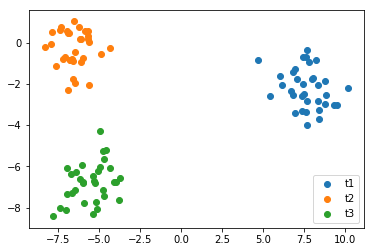

In [149]:
plt.scatter(df.loc[df['target']==0, 'f1'], df.loc[df['target']==0, 'f2'],
           label = 't1')
plt.scatter(df.loc[df['target']==1, 'f1'], df.loc[df['target']==1, 'f2'],
            label = 't2')
plt.scatter(df.loc[df['target']==2, 'f1'], df.loc[df['target']==2, 'f2'],
            label = 't3')
plt.legend()
plt.show()

## Log reg

In [150]:
def Z(X, W, b):
    return np.dot(X, W) + b

In [151]:
def sig(Z):
    return 1/(1+np.exp(-Z))

In [152]:
def soft(Z):
    exp_Z = np.exp(Z)
    return exp_Z/np.sum(exp_Z, axis=1, keepdims=True)

In [153]:
Z1 = Z(X, W1, b1)
Z1.shape

(100, 4)

In [154]:
y1 = sig(Z1)
y1.shape

(100, 4)

In [155]:
Z2 = Z(y1, W2, b2)
Z2.shape

(100, 3)

In [156]:
y2 = soft(Z2)
y2.shape

(100, 3)

In [157]:
def ohe(t):
    result = np.zeros((N,K))
    for i in range(len(t)):
        result[i, t[i]] = 1
    return result

In [158]:
def cost(t, y):
    return -t*np.log(y)

In [159]:
cost1 = cost(ohe(t), y2)
cost1.shape

(100, 3)

In [160]:
def error(cost):
    return (cost.sum())/N

In [161]:
err0 = error(cost1)
err0

1.156132068506528

In [162]:
def accuracy(t, y):
    return (t==np.round(y)).mean()

In [163]:
acc0 = accuracy(ohe(t), y2)
acc0

0.78

In [164]:
err_reg = [err0]
acc_reg = [acc0]

In [165]:
lr = 0.001
cache_W1 = 0
cache_b1 = 0
cache_W2 = 0
cache_b2 = 0
decay = 0.99
eps = 10e-8

print('initial error: {}'.format(err0))

initial error: 1.156132068506528


In [172]:
for e in range(15000):

    Z1 = Z(X, W1, b1)
    y1 = sig(Z1)
    Z2 = Z(y1, W2, b2)
    y2 = soft(Z2)
    cost1 = cost(ohe(t), y2)
    error1 = error(cost1)
    
    dZ2 = (ohe(t) - y2)
    dw2 = np.dot(y1.T, dZ2)
    db2 = (dZ2.sum(axis=0))
    cache_W2 += dw2*dw2
    cache_b2 += db2*db2
    
    dZ1 = np.dot(dZ2, W2.T)*(y1*(1-y1))
    dw1 = np.dot(X.T, dZ1)
    db1 = (dZ1.sum(axis=0))
    cache_W1 += dw1*dw1
    cache_b1 += db1*db1
    
    W2 += (lr*dw2)/(np.sqrt(cache_W2 + eps))
    b2 += (lr*db2)/(np.sqrt(cache_b2 + eps))
    W1 += (lr*dw1)/(np.sqrt(cache_W1 + eps))
    b1 += (lr*db1) /(np.sqrt(cache_b1 + eps))   
    
    if e % 100 == 0:
        err_reg.append(error1)
        acc_reg.append(accuracy(ohe(t), y2))
        print('error:{}'.format(error1))

error:0.44057564944935224
error:0.4402083460215097
error:0.439842072537502
error:0.4394768239051727
error:0.43911259506508943
error:0.43874938099029154
error:0.43838717668603705
error:0.4380259771895559
error:0.4376657775698016
error:0.43730657292720876
error:0.4369483583934499
error:0.4365911291311973
error:0.436234880333884
error:0.43587960722547
error:0.4355253050602078
error:0.4351719691224132
error:0.434819594726235
error:0.4344681772154294
error:0.4341177119631348
error:0.4337681943716501
error:0.43341961987221306
error:0.43307198392478274
error:0.4327252820178227
error:0.43237950966808664
error:0.4320346624204056
error:0.4316907358474772
error:0.43134772554965795
error:0.4310056271547548
error:0.4306644363178219
error:0.4303241487209556
error:0.42998476007309505
error:0.4296462661098214
error:0.42930866259316036
error:0.42897194531138694
error:0.42863611007883046
error:0.4283011527356822
error:0.427967069147805
error:0.427633855206544
error:0.4273015068285397
error:0.42697001995

In [173]:
accuracy(ohe(t), y2)

0.9966666666666667

## Graph

### Constant learning rate

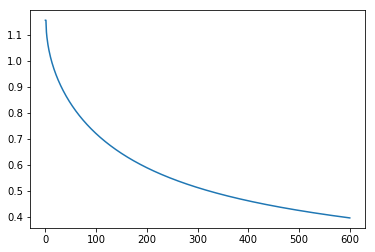

In [174]:
plt.plot(err_reg)
plt.show()

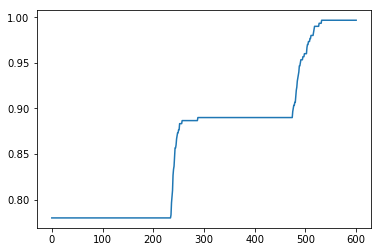

In [175]:
plt.plot(acc_reg)
plt.show()

# test

In [14]:
lr1 = [0.1]

In [15]:
for i in range(100):
    k = 0.1
    lr1.append(lr1[0]*np.exp(- k * i))

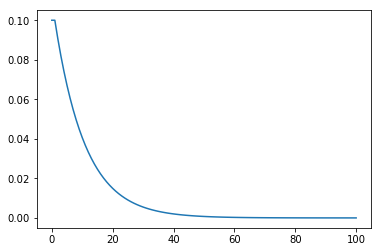

In [16]:
plt.plot(lr)
plt.show()

In [17]:
lr2 = [0.1]

In [18]:
for i in range(100):
    k = 0.1
    lr2.append(lr2[0]/((k * i) + 1))

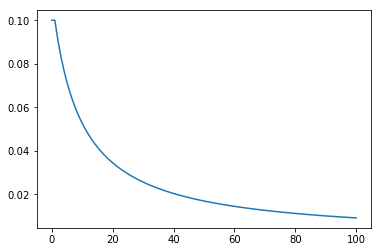

In [19]:
plt.plot(lr2)
plt.show()

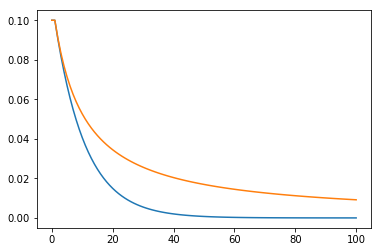

In [20]:
plt.plot(lr1)
plt.plot(lr2)
plt.show()

In [176]:
cache_W1

array([[4.16028012e+02, 1.63113329e-01, 1.02483706e+05, 7.93046222e+05],
       [1.00747036e+04, 5.28407910e-01, 3.76657120e+05, 1.61470522e+06]])